# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [ ]:
path =r'C:\Users\avin\TMI-102\TMI 102 Plant leaf Disease new dataset\valid'
validation_set = tf.keras.utils.image_dataset_from_directory(path,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 47172 files belonging to 77 classes.
['Apple_Fruit___Blotch', 'Apple_Fruit___Normal', 'Apple_Fruit___Rot', 'Apple_Fruit___Scab', 'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cauliflower___Black Rot', 'Cauliflower___Healthy', 'Cauliflower___Insect Hole', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Guava_Fruit___black_mold', 'Guava___Wilt', 'Guava___healthy_leaf', 'Guava___insect_bite', 'Guava___multiple', 'Guava___red_rust', 'Guava___scorch', 'Guava_fruit___healthy_fruit', 'Guava_fruit___scab', 'Healthy Potatoes', 'Mango_Fruit___Alternaria', 'Mango_Fruit___Anthracnose', 'Mango_Fruit___Black Mould Rot', 'Mango_Fru

# Loading Model

In [3]:
model = tf.keras.models.load_model('trained_model.h5')

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 61, 61, 64)        36928     
                                                      

In [5]:
# Test Image Visualization
import cv2
import matplotlib.pyplot as plt # Add this line

#Visualising and Performing Prediction on Single image

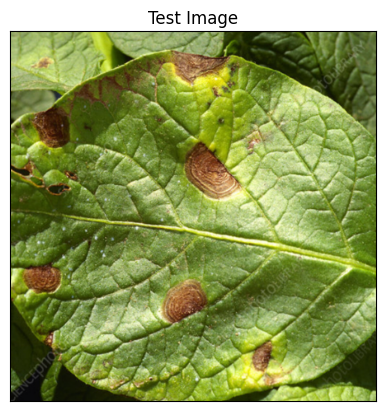

In [19]:
# Test Image Visualization
import cv2

# Corrected the path using a raw string
image_path = r'C:\Users\avin\Pictures\Screenshots\Screenshot 2025-10-24 184729.png'
# Reading an image in default mode
img = cv2.imread(image_path)

# Converting BGR to RGB
# OpenCV reads images in BGR, Matplotlib displays in RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([]) # Hides x-axis ticks
plt.yticks([]) # Hides y-axis ticks
plt.show()

## Testing Model

In [20]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
print(input_arr.shape)

(1, 128, 128, 3)


In [21]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 14ms/step


(array([[2.29169609e-06, 4.39090610e-01, 2.20496768e-05, 5.59330046e-01,
         5.61586277e-10, 3.53962236e-15, 7.48441170e-11, 3.72825481e-18,
         2.90815410e-20, 1.26017954e-14, 1.59131218e-22, 2.06150895e-17,
         6.02773897e-16, 9.49620428e-14, 2.52725272e-07, 2.30723828e-07,
         2.46624779e-07, 6.28448465e-12, 8.69185626e-12, 2.16490525e-14,
         1.13423897e-12, 4.83198888e-21, 3.19570899e-15, 1.09720586e-30,
         9.25090444e-22, 3.65924648e-23, 3.31613163e-25, 1.00732875e-23,
         3.06967235e-24, 1.46194135e-12, 1.41767401e-03, 6.73335628e-25,
         1.28845346e-21, 3.25453721e-13, 1.10343571e-21, 3.41387184e-19,
         4.81442649e-25, 1.54590812e-10, 1.19727908e-10, 9.68821980e-20,
         2.36069546e-30, 2.17913029e-19, 1.79722618e-21, 1.22278636e-20,
         3.13194568e-18, 1.41072972e-20, 2.42931315e-15, 4.77486887e-12,
         3.84727783e-18, 1.92024316e-07, 2.92428109e-15, 1.46343424e-19,
         6.22425379e-16, 2.48181088e-18, 2.84903187

In [22]:
result_index = np.argmax(prediction) #Return index of max element
result_index

3

In [16]:
class_name=['Apple_Fruit___Blotch',
 'Apple_Fruit___Normal',
 'Apple_Fruit___Rot',
 'Apple_Fruit___Scab',
 'Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cauliflower___Black Rot',
 'Cauliflower___Healthy',
 'Cauliflower___Insect Hole',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Guava_Fruit___black_mold',
 'Guava___Wilt',
 'Guava___healthy_leaf',
 'Guava___insect_bite',
 'Guava___multiple',
 'Guava___red_rust',
 'Guava___scorch',
 'Guava_fruit___healthy_fruit',
 'Guava_fruit___scab',
 'Healthy Potatoes',
 'Mango_Fruit___Alternaria',
 'Mango_Fruit___Anthracnose',
 'Mango_Fruit___Black Mould Rot',
 'Mango_Fruit___Healthy',
 'Mango_Fruit___Rot',
 'Mango___Anthracnose',
 'Mango___Bacterial Canker',
 'Mango___Cutting Weevil',
 'Mango___Die Back',
 'Mango___Gall Midge',
 'Mango___Healthy',
 'Mango___Powdery Mildew',
 'Mango___Sooty Mould',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Patato__Common Scab',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato__Blackleg',
 'Potato__Dry Rot',
 'Potato__Pink Rot',
 'Potato___Black Scurf',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato_Fruit_Damaged',
 'Tomato_Fruit_Old',
 'Tomato_Fruit_Ripe',
 'Tomato_Fruit_Unripe',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

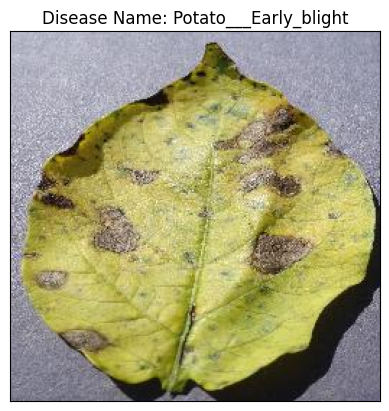

In [17]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


In [18]:
model_prediction

'Potato___Early_blight'